FEATURE SELECTION

*   *Load the dataset*



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Алгоритмы ХИИ/combined_dataset.csv')

<ipython-input-78-865b8d050a4b>:4: DtypeWarning: Columns (364,365,366,373,374,375,382,383,384,391,392,393,400,401,402,409,410,411,418,419,420,427,428,429,436,437,438,445,446,447,454,455,456,571,572,573,580,581,582,589,590,591,598,599,600,607,608,609,616,617,618,625,626,627,634,635,636,643,644,645,652,653,654,661,662,663,670,671,672,678,679,680,686,687,688,692,693,694,695,696,702,703,704,710,711,712,718,719,720,726,727,728,734,735,736,742,743,744,750,751,752,758,759,760,766,767,768,774,775,776,782,783,784,788,789,790,791,792,798,799,800,806,807,808,814,815,816,822,823,824,830,831,832,838,839,840,846,847,848,854,855,856,862,863,864,1059,1095,1096,1097,1111,1112,1113,1576,1577) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Алгоритмы ХИИ/combined_dataset.csv')


In [ ]:
data.head()

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,gdb_47998,O=CC#CC1NC1C#N,3.18840,0.81811,0.68296,5.2689,76.23,-0.2760,-0.0779,0.1980,...,8.773230,56.918277,120.032363,9.233259,105,7,40.0,45.0,3.472222,2.277778
1,gdb_82240,CC1C2OC2C2CCC12,2.49891,1.84690,1.37865,1.7357,80.46,-0.2519,0.0814,0.3333,...,9.964253,61.835066,124.088815,5.908991,75,10,58.0,76.0,2.305556,1.805556
2,gdb_10336,COC(C=O)C(C)O,2.35684,1.74283,1.08466,2.5701,65.19,-0.2421,-0.0289,0.2132,...,8.124151,34.544698,118.062994,6.559055,67,8,30.0,31.0,4.722222,2.111111
3,gdb_116764,COC=NCC(N)C#N,4.94611,0.59499,0.55127,6.0816,79.07,-0.2514,-0.0038,0.2477,...,7.739359,34.994205,127.074562,7.059698,110,7,32.0,31.0,4.361111,2.416667
4,gdb_105134,COC1(CC1C#C)C#C,2.55281,1.23863,1.00440,1.5674,83.69,-0.2402,0.0209,0.2612,...,9.372374,59.406478,120.057515,7.062207,89,10,44.0,54.0,4.173611,2.291667


*   *Choose descriptors only*



In [ ]:
data = data.drop(columns=['mol_id']).loc[ : ,'MolWt':'mZagreb2' ]
data

,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,120.111,116.079,120.032363,44,0,0.192350,-0.288633,0.288633,0.192350,1.555556,...,8.773230,56.918277,120.032363,9.233259,105,7,40.0,45.0,3.472222,2.277778
1,124.183,112.087,124.088815,50,0,0.087513,-0.368976,0.368976,0.087513,1.111111,...,9.964253,61.835066,124.088815,5.908991,75,10,58.0,76.0,2.305556,1.805556
2,118.132,108.052,118.062994,48,0,0.150906,-0.390241,0.390241,0.150906,1.750000,...,8.124151,34.544698,118.062994,6.559055,67,8,30.0,31.0,4.722222,2.111111
3,127.147,118.075,127.074562,50,0,0.168557,-0.486682,0.486682,0.168557,2.000000,...,7.739359,34.994205,127.074562,7.059698,110,7,32.0,31.0,4.361111,2.416667
4,120.151,112.087,120.057515,46,0,0.142589,-0.364245,0.364245,0.142589,1.666667,...,9.372374,59.406478,120.057515,7.062207,89,10,44.0,54.0,4.173611,2.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,128.127,120.063,128.047344,50,0,0.316199,-0.435234,0.435234,0.316199,1.777778,...,9.468928,55.871443,128.047344,7.532197,73,9,52.0,63.0,3.284722,1.833333
19996,125.127,118.071,125.047678,48,0,0.141193,-0.303021,0.303021,0.141193,1.555556,...,10.025749,62.227835,125.047678,7.815480,88,8,52.0,67.0,3.284722,2.069444
19997,109.128,102.072,109.052764,42,0,0.111511,-0.380679,0.380679,0.111511,1.750000,...,7.475906,33.090360,109.052764,7.270184,79,5,28.0,26.0,4.111111,2.083333
19998,113.120,106.064,113.058912,44,0,0.219846,-0.290652,0.290652,0.219846,1.750000,...,8.124151,34.544698,113.058912,7.537261,67,8,30.0,31.0,4.722222,2.111111


*   *Check descriptor data types*








In [ ]:
import numpy as np

list(np.unique(data.dtypes))

[dtype('int64'), dtype('float64'), dtype('O')]

*   *Split numerical and boolean data types*



In [ ]:
am_bool = data.select_dtypes(np.bool8)

am_num = data.select_dtypes(exclude='bool')

<ipython-input-82-7f5dc6346f92>:1: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  am_bool = data.select_dtypes(np.bool8)


In [ ]:
am_bool

""
0
1
2
3
4
...
19995
19996
19997
19998




---

FILTER METHODS

---



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


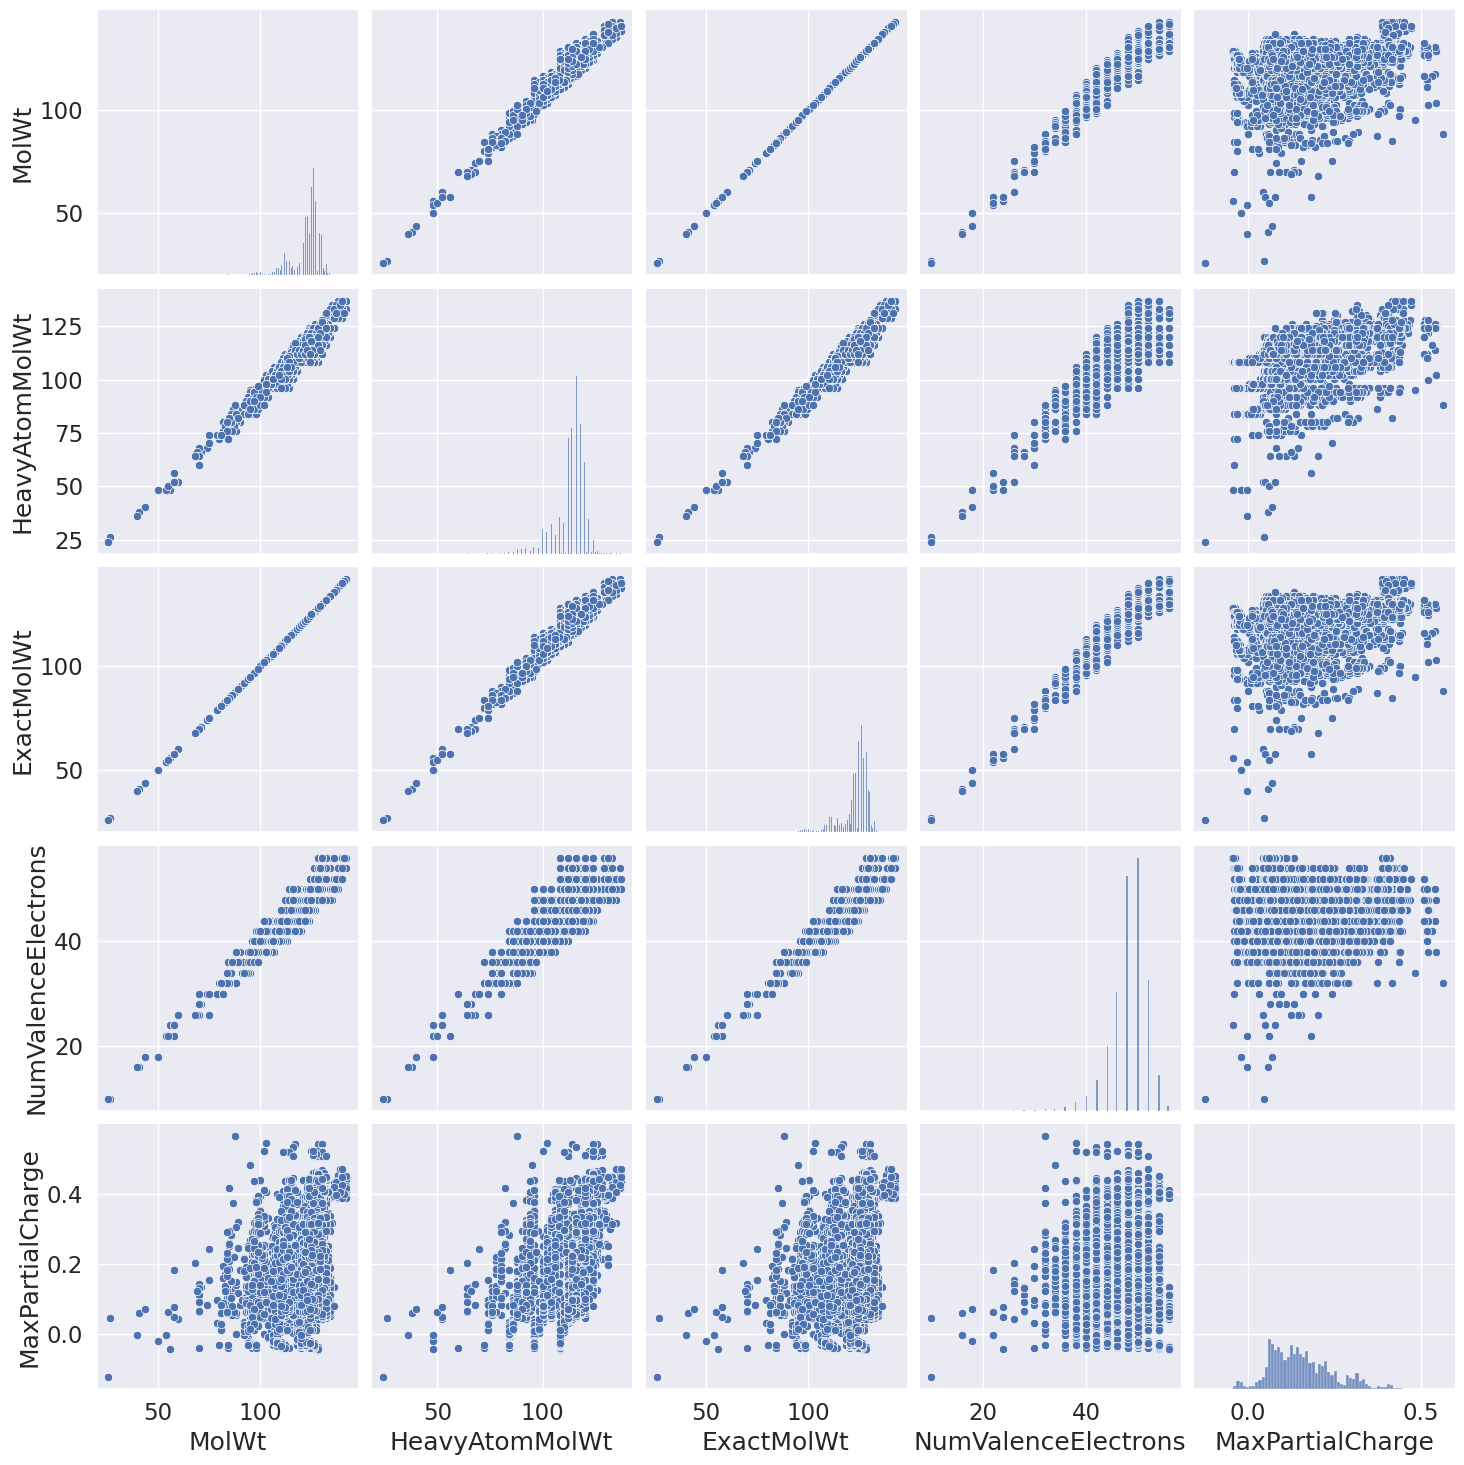

In [ ]:
import seaborn as sns

sns.pairplot(am_num.iloc[:,range(5)], size=3.0)

*   Calculate **covariance** / **Pearson's or Spearman's coefficient** with **np.cov()** / **df.corr(method='pearson')**



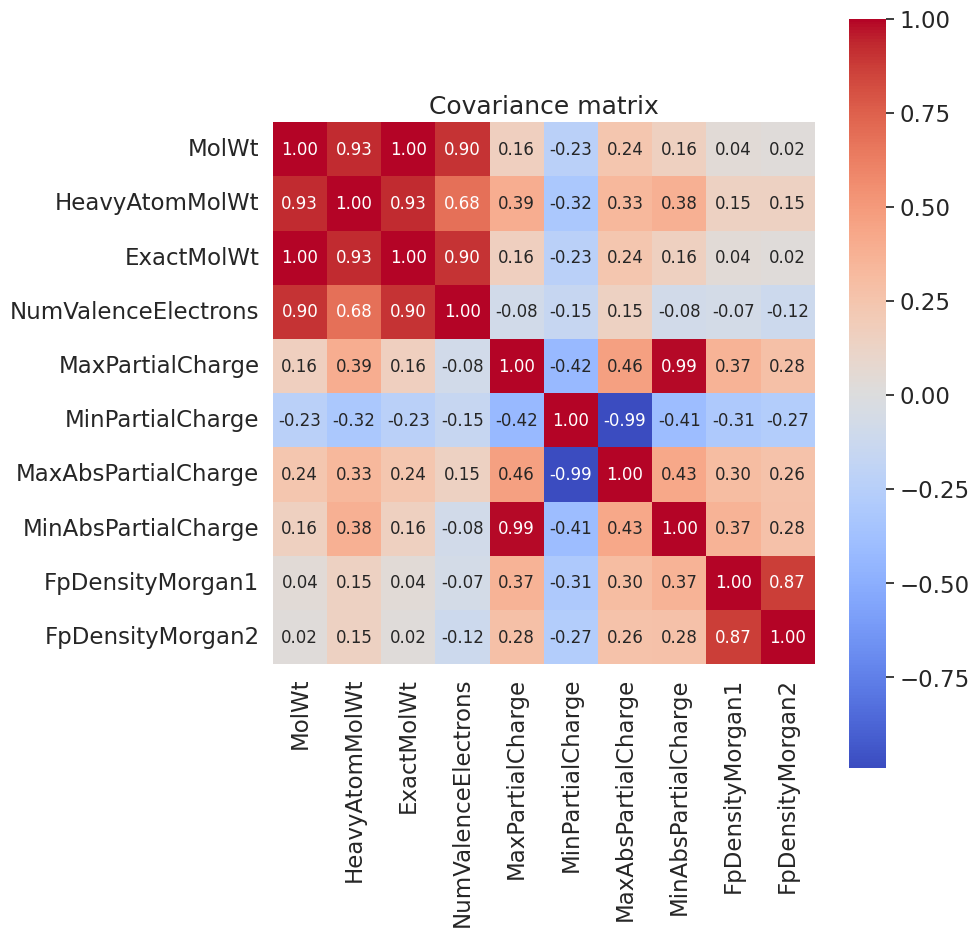

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

cols = am_num.columns[:10]

stdsc = StandardScaler()
X_std = stdsc.fit_transform(am_num[cols].iloc[:,range(10)].values)

cov_mat =np.cov(X_std.T)

plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix', size = 18)
plt.tight_layout()
plt.show()

*   *Filter out highly correlated features*



In [ ]:
FILTER_THRESHOLD = 0.9

cov_mat_df = pd.DataFrame(cov_mat, columns=cols)

upper_tri = cov_mat_df.where(
    np.triu(
        np.ones(cov_mat_df.shape), k=1).astype(bool)
        )

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > FILTER_THRESHOLD)]

df_after_FS = am_num.drop(to_drop, axis=1)

In [ ]:
cov_mat_df

,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2
0,1.000050,0.927707,1.000049,0.903546,0.161846,-0.234269,0.239991,0.155438,0.037939,0.024502
1,0.927707,1.000050,0.928025,0.684088,0.394875,-0.318118,0.332907,0.383402,0.145524,0.149385
2,1.000049,0.928025,1.000050,0.903288,0.162743,-0.234832,0.240595,0.156313,0.038392,0.024809
3,0.903546,0.684088,0.903288,1.000050,-0.082200,-0.152539,0.148492,-0.082355,-0.066613,-0.119263
4,0.161846,0.394875,0.162743,-0.082200,1.000050,-0.424664,0.464055,0.989545,0.367509,0.278348
5,-0.234269,-0.318118,-0.234832,-0.152539,-0.424664,1.000050,-0.990949,-0.407471,-0.305206,-0.268045
6,0.239991,0.332907,0.240595,0.148492,0.464055,-0.990949,1.000050,0.431603,0.301955,0.262299
7,0.155438,0.383402,0.156313,-0.082355,0.989545,-0.407471,0.431603,1.000050,0.365274,0.275775
8,0.037939,0.145524,0.038392,-0.066613,0.367509,-0.305206,0.301955,0.365274,1.000050,0.873562
9,0.024502,0.149385,0.024809,-0.119263,0.278348,-0.268045,0.262299,0.275775,0.873562,1.000050


In [ ]:
upper_tri

,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2
0,NaN,0.927707,1.000049,0.903546,0.161846,-0.234269,0.239991,0.155438,0.037939,0.024502
1,NaN,NaN,0.928025,0.684088,0.394875,-0.318118,0.332907,0.383402,0.145524,0.149385
2,NaN,NaN,NaN,0.903288,0.162743,-0.234832,0.240595,0.156313,0.038392,0.024809
3,NaN,NaN,NaN,NaN,-0.082200,-0.152539,0.148492,-0.082355,-0.066613,-0.119263
4,NaN,NaN,NaN,NaN,NaN,-0.424664,0.464055,0.989545,0.367509,0.278348
5,NaN,NaN,NaN,NaN,NaN,NaN,-0.990949,-0.407471,-0.305206,-0.268045
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.431603,0.301955,0.262299
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365274,0.275775
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.873562
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*   *Lets check the correlation of two boolean features*

Note: they **can't** be treated as rank variables.



In [ ]:
am_bool

In [ ]:
am_bool_int = am_bool * 1

In [ ]:
am_bool_int

,Lipinski,GhoseFilter
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
19995,1,0
19996,1,0
19997,1,0
19998,1,0




*   *Let's try chi-squared test*



In [ ]:
contigency = pd.crosstab(am_bool['Lipinski'], am_bool['GhoseFilter'])

<Axes: xlabel='GhoseFilter', ylabel='Lipinski'>

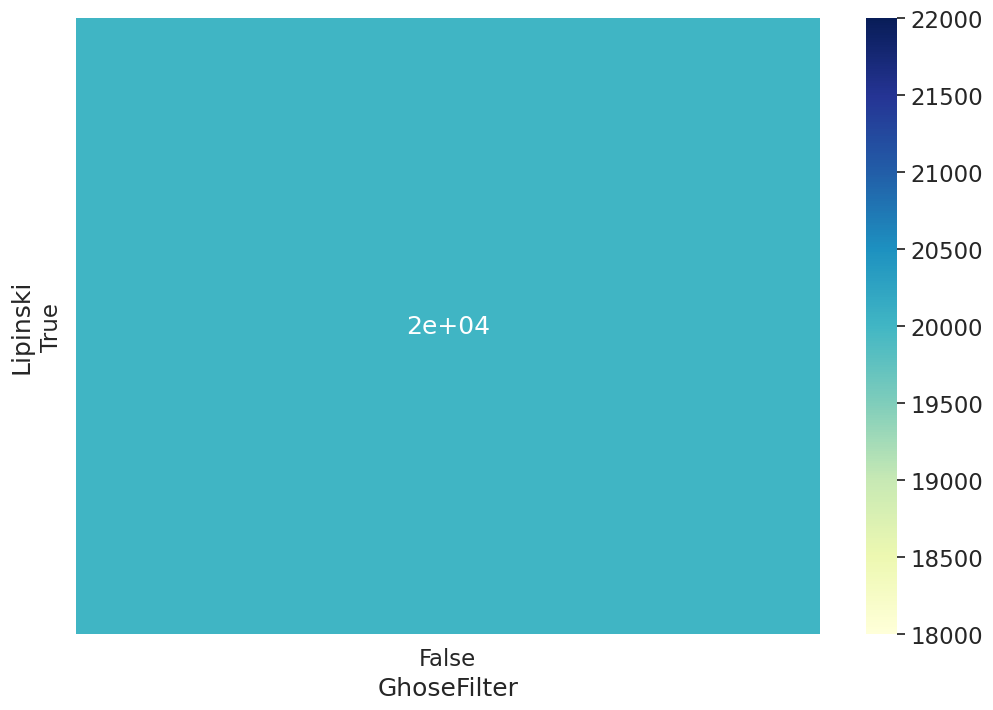

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [ ]:
import scipy

chi_squared, p, _, _ = scipy.stats.chi2_contingency(contigency)

In [ ]:
chi_squared
p

1.0

Оставляем только нужные колонки

In [ ]:
# Проверяем количество уникальных значений в каждой колонке
unique_counts = data.nunique()

# Выбираем колонки, в которых количество уникальных значений равно 1
columns_to_drop = unique_counts[unique_counts == 1].index

# Удаляем выбранные колонки
featured_data = data.drop(columns=columns_to_drop)
featured_data

,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,120.111,116.079,120.032363,44,0.192350,-0.288633,0.288633,0.192350,1.555556,2.333333,...,8.773230,56.918277,120.032363,9.233259,105,7,40.0,45.0,3.472222,2.277778
1,124.183,112.087,124.088815,50,0.087513,-0.368976,0.368976,0.087513,1.111111,1.888889,...,9.964253,61.835066,124.088815,5.908991,75,10,58.0,76.0,2.305556,1.805556
2,118.132,108.052,118.062994,48,0.150906,-0.390241,0.390241,0.150906,1.750000,2.250000,...,8.124151,34.544698,118.062994,6.559055,67,8,30.0,31.0,4.722222,2.111111
3,127.147,118.075,127.074562,50,0.168557,-0.486682,0.486682,0.168557,2.000000,2.666667,...,7.739359,34.994205,127.074562,7.059698,110,7,32.0,31.0,4.361111,2.416667
4,120.151,112.087,120.057515,46,0.142589,-0.364245,0.364245,0.142589,1.666667,2.333333,...,9.372374,59.406478,120.057515,7.062207,89,10,44.0,54.0,4.173611,2.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,128.127,120.063,128.047344,50,0.316199,-0.435234,0.435234,0.316199,1.777778,2.555556,...,9.468928,55.871443,128.047344,7.532197,73,9,52.0,63.0,3.284722,1.833333
19996,125.127,118.071,125.047678,48,0.141193,-0.303021,0.303021,0.141193,1.555556,2.333333,...,10.025749,62.227835,125.047678,7.815480,88,8,52.0,67.0,3.284722,2.069444
19997,109.128,102.072,109.052764,42,0.111511,-0.380679,0.380679,0.111511,1.750000,2.375000,...,7.475906,33.090360,109.052764,7.270184,79,5,28.0,26.0,4.111111,2.083333
19998,113.120,106.064,113.058912,44,0.219846,-0.290652,0.290652,0.219846,1.750000,2.250000,...,8.124151,34.544698,113.058912,7.537261,67,8,30.0,31.0,4.722222,2.111111




---

WRAPPER METHODS

---






*   *Let's try out genetic algorithm for feature selection*



In [ ]:
!pip install sklearn-genetic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.7 MB/s eta 0:00:00


In [ ]:
am_num

,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,120.111,116.079,120.032363,44,0,0.192350,-0.288633,0.288633,0.192350,1.555556,...,8.773230,56.918277,120.032363,9.233259,105,7,40.0,45.0,3.472222,2.277778
1,124.183,112.087,124.088815,50,0,0.087513,-0.368976,0.368976,0.087513,1.111111,...,9.964253,61.835066,124.088815,5.908991,75,10,58.0,76.0,2.305556,1.805556
2,118.132,108.052,118.062994,48,0,0.150906,-0.390241,0.390241,0.150906,1.750000,...,8.124151,34.544698,118.062994,6.559055,67,8,30.0,31.0,4.722222,2.111111
3,127.147,118.075,127.074562,50,0,0.168557,-0.486682,0.486682,0.168557,2.000000,...,7.739359,34.994205,127.074562,7.059698,110,7,32.0,31.0,4.361111,2.416667
4,120.151,112.087,120.057515,46,0,0.142589,-0.364245,0.364245,0.142589,1.666667,...,9.372374,59.406478,120.057515,7.062207,89,10,44.0,54.0,4.173611,2.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,128.127,120.063,128.047344,50,0,0.316199,-0.435234,0.435234,0.316199,1.777778,...,9.468928,55.871443,128.047344,7.532197,73,9,52.0,63.0,3.284722,1.833333
19996,125.127,118.071,125.047678,48,0,0.141193,-0.303021,0.303021,0.141193,1.555556,...,10.025749,62.227835,125.047678,7.815480,88,8,52.0,67.0,3.284722,2.069444
19997,109.128,102.072,109.052764,42,0,0.111511,-0.380679,0.380679,0.111511,1.750000,...,7.475906,33.090360,109.052764,7.270184,79,5,28.0,26.0,4.111111,2.083333
19998,113.120,106.064,113.058912,44,0,0.219846,-0.290652,0.290652,0.219846,1.750000,...,8.124151,34.544698,113.058912,7.537261,67,8,30.0,31.0,4.722222,2.111111


In [ ]:
# Просмотр типов данных в колонке 'MolWt'
print(am_num['MolWt'].dtype)

float64


In [ ]:
am_num['MolWt'] = am_num['MolWt'].astype(float)
print(am_num['MolWt'].dtype)

float64


In [ ]:
# Убедитесь, что все значения в столбце 'MolWt' могут быть преобразованы в числа
# Если в столбце есть некорректные значения, замените их на NaN
am_num['MolWt'] = pd.to_numeric(am_num['MolWt'], errors='coerce')

# Удалите строки с некорректными значениями
am_num = am_num.dropna(subset=['MolWt'])

# Преобразуйте значения в тип float
am_num['MolWt'] = am_num['MolWt'].astype(float)


In [ ]:
print(am_num['MolWt'].unique())

In [ ]:
from genetic_selection import GeneticSelectionCV
from sklearn.ensemble import RandomForestRegressor

# X = am_num.drop(['MolWt'], axis=1)
y = am_num['MolWt'].astype(np.float64)
X = am_num.drop(['MolWt'], axis=1)

estimator = RandomForestRegressor()

model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="r2", max_features=5,
    n_population=5, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=20,
    caching=True, n_jobs=-1)

model = model.fit(X, y)

In [ ]:
print('Features:', X.columns[model.support_])

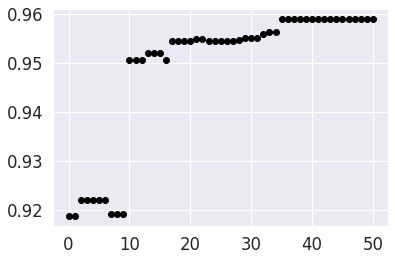

In [ ]:
plt.plot(model.generation_scores_, 'o', color='black')

In [ ]:
featured_data = featured_data.to_csv('/content/drive/MyDrive/Алгоритмы ХИИ/featured_dataset.csv', index=False)

Таким образом, я сделала feature selection и сократила количество колонок в датасете